(252, 252) 117.852796674
(252, 252)


/usr/local/lib/python3.6/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


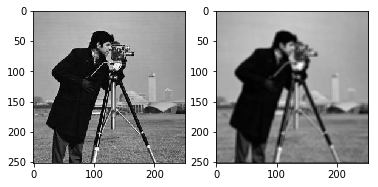

In [5]:
%matplotlib inline
import numpy as np
import os, string
from matplotlib import pyplot as plt
import scipy as sp
import cv2
import tensorflow as tf

img = cv2.imread('camera.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#img = cv2.resize(img,(0,0),fx=0.5,fy=0.5)
print(img.shape,img.mean())
dia = 5
blurKernel = np.ones((dia,dia))/(dia**2.)

from scipy import signal#warning
blurImg = signal.convolve2d(img, blurKernel, mode='same')
print(blurImg.shape)
fig = plt.figure()
ax = fig.add_subplot(121)  
ax.imshow(img,cmap='gray')
ax = fig.add_subplot(122)  
ax.imshow(blurImg,cmap='gray')
fig.show()

$$argmin\frac{1}{2}(AX-B)^2+\lambda |X|$$

In [6]:
with tf.device('/cpu:0'):
    initial = tf.random_normal([1,252,252,1]) * 0.256
    X = tf.Variable(initial)
    A=tf.placeholder("float", shape=[dia,dia,1,1])
    B=tf.placeholder("float", shape=[1,252,252,1])
    mu = 0.001
    loss = tf.nn.conv2d(X,A,strides=[1,1,1,1],padding='SAME')
    loss = loss - B
    loss = tf.reshape(loss,[252*252,-1])
    X_ravel = tf.reshape(X,[252*252,-1])
    loss = tf.nn.l2_loss(loss)+mu*tf.reduce_mean(tf.abs(X_ravel-118.))#L1#tf.nn.l2_loss(X_ravel-118.)#L2

In [9]:
train_op = tf.train.GradientDescentOptimizer(0.5).minimize(loss)
sess = tf.Session()
#print(sess)
init = tf.global_variables_initializer()
sess.run(init)
blurImg_ravel = blurImg.reshape([252,252,1,1])
blurImg_ravel = blurImg_ravel.transpose(3,0,1,2)
blurKernel_ravel = blurKernel.reshape([dia,dia,1,1])
for step in range(101):
    sess.run(train_op,feed_dict={A: blurKernel_ravel, B:blurImg_ravel})
    if step % 100 == 0:
        print('epoch:',step)

res = sess.run(X)
print(res.shape)

epoch: 0
epoch: 100
(1, 252, 252, 1)


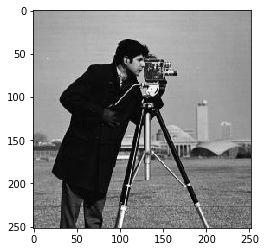

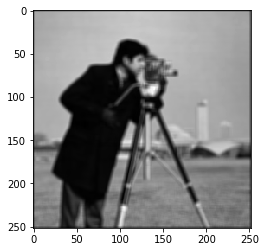

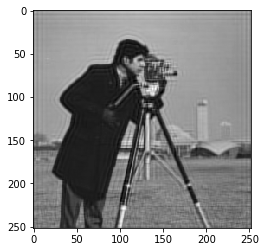

In [10]:
resImg = res.transpose([1,2,3,0])
resImg = resImg.reshape([252,252])
fig = plt.figure()
plt.imshow(img,cmap='gray')
fig = plt.figure()
plt.imshow(blurImg,cmap='gray')
fig = plt.figure()
plt.imshow(resImg,cmap='gray')
plt.show()
# ax = fig.add_subplot(131)  
# ax.imshow(img,cmap='gray')
# ax = fig.add_subplot(132)  
# ax.imshow(blurImg,cmap='gray')
# ax = fig.add_subplot(133)  
# ax.imshow(res,cmap='gray')
# fig.show()

(1, 252, 252, 1)
